In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='poster')
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import sys
sys.path.append('..')
from model_equations_separate_NC_store_numba import *


In [4]:
morder = ['EXOENZYME','OVERFLOW',   'ROS','MIXOTROPH',]#'MIN', ]
media_order = ['lowN', 'pro99']
mpalette = [ '#426b69', '#9b7874', '#b191ff', '#84dcc6',]# '#d6d4a0',]
sns.color_palette(mpalette)

[(0.25882352941176473, 0.4196078431372549, 0.4117647058823529),
 (0.6078431372549019, 0.47058823529411764, 0.4549019607843137),
 (0.6941176470588235, 0.5686274509803921, 1.0),
 (0.5176470588235295, 0.8627450980392157, 0.7764705882352941)]

In [5]:
morder1 = morder[:-1]
mpalette1 = mpalette[:-1]

In [6]:
gorder = [ 'Strong', 'Sustained', 'Inhibited', 'Weak', 'Neutral',   'Other']
gpalette = sns.color_palette('Set2', n_colors=4).as_hex() + ['black', 'lightgrey']
gpalette = ['#882255', '#CC6677', '#332288', 
             '#44AA99','#88CCEE',
            '#D0CFCA',  ]

sns.color_palette(gpalette)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.2, 0.13333333333333333, 0.5333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.8156862745098039, 0.8117647058823529, 0.792156862745098)]

In [7]:
gorder1 = ['Strong', 'Sustained', 'Weak','Inhibited',  ]
gpalette1 = gpalette[:2] + [gpalette[3], gpalette[2], ]
sns.color_palette(gpalette1)

[(0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.8, 0.4, 0.4666666666666667),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.2, 0.13333333333333333, 0.5333333333333333)]

In [8]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Np', 'Bh','Nh',  'ABp', 'ABh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Cp', 'Bh[C]', 'Ch', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'ABp[C]', 'ABh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (1.0, 0.8235294117647058, 0.6627450980392157),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [9]:
ccnorder = ['Bp', 'Np','Bh',  'Nh', 'DIN','DON',  'RDON', ]
ccnpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DINCOLOR, DONCOLOR, RDONCOLOR, ]

#Hex Codes: #262842, #293961, #2C497F, #8897BD, #E3E4FA
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
#Hex Codes: #5E1525, #C74F29, #E99E46, #B6C38D, #828144
ccnpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#262842', '#2C497F', '#8897BD']
#ccnpalette = ['#828144', '#B6C38D', '#E99E46', '#E7BB96', '#262842', '#2C497F', '#8897BD']
cccorder = ['Bp[C]', 'Cp','Bh[C]',  'Ch', 'DIC','DOC',  'RDOC', ]
cccpalette = [PCOLOR, PCOLOR_light, HCOLOR, HCOLOR_light,DICCOLOR, DOCCOLOR, RDOCCOLOR, ]
#Hex Codes: #49593C, #945C39, #DF5F35, #EF9E84, #FFE3D1
cccpalette = ['#2F6755', '#98A69A', '#7d5c54', '#E7BB96', '#DF5F35', '#EF9E84', '#ffd8d1']

sns.color_palette(cccpalette)

[(0.1843137254901961, 0.403921568627451, 0.3333333333333333),
 (0.596078431372549, 0.6509803921568628, 0.6039215686274509),
 (0.49019607843137253, 0.3607843137254902, 0.32941176470588235),
 (0.9058823529411765, 0.7333333333333333, 0.5882352941176471),
 (0.8745098039215686, 0.37254901960784315, 0.20784313725490197),
 (0.9372549019607843, 0.6196078431372549, 0.5176470588235295),
 (1.0, 0.8470588235294118, 0.8196078431372549)]

In [10]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (1.0, 0.8235294117647058, 0.6627450980392157)]

In [11]:
dpath = '../results/final/het'

In [12]:
dpath

'../results/final/het'

In [13]:
comb_df = pd.read_csv(os.path.join(dpath, 'integrated_last_core_models_versatile_het.csv.gz'))


In [14]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Bp Final', 'Np Final',
       ...
       'additionalLossRatep Integrated', 'additionalLossRateh Integrated',
       'deathC_DOCp Integrated', 'deathC_DOCh Integrated',
       'deathN_DONp Integrated', 'deathN_DONh Integrated', 'PP',
       'Total N uptake', 'PP / total fixed C', 'N reuse'],
      dtype='object', length=125)

In [15]:
def _change_col(c):
    suffixes = ('Integrated','Final')
    for suffix in suffixes:
        s = f' {suffix}'
        if c.endswith(s):
            c = c.replace(s, '')
            c= f'{suffix} {c}'
            return c
    return c
comb_df.rename(columns={c:_change_col(c) for c in comb_df.columns}, inplace=True)


In [16]:
list(comb_df.columns)

['model',
 'Phase',
 'VPRO',
 'Versatile',
 'run_id',
 'y_pred',
 'Sample',
 'max_prob',
 'Final Bp',
 'Final Np',
 'Final Cp',
 'Final Bh',
 'Final Nh',
 'Final Ch',
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 't',
 'day',
 'Final gross_uptakeINp',
 'Final gross_uptakeINh',
 'Final gross_uptakeONp',
 'Final gross_uptakeONh',
 'Final gross_uptakeICp',
 'Final gross_uptakeICh',
 'Final gross_uptakeOCp',
 'Final gross_uptakeOCh',
 'uptakeNp',
 'uptakeNh',
 'uptakeCp',
 'uptakeCh',
 'QCp',
 'QCh',
 'biosynthesisNp',
 'biosynthesisNh',
 'Final respirationCp',
 'Final respirationCh',
 'biomass_breakdownCp',
 'biomass_breakdownCh',
 'Final overflowNp',
 'Final overflowNh',
 'Final overflowCp',
 'Final overflowCh',
 'Bp[C]',
 'Final Bptotal[N]',
 'Final Bptotal[C]',
 'Bh[C]',
 'Final Bhtotal[N]',
 'Final Bhtotal[C]',
 'Final ROSproductionp',
 'Final ROSproductionh',
 'Final ROSlossp',
 'Final ROSlossh',
 'deathbiomassNp',
 'deathbiomass

In [17]:
comb_df['Final Organic C'] = comb_df[['Final DOC', 'Final RDOC', 'Final Bptotal[C]', 'Final Bhtotal[C]', ]].sum(axis=1)
comb_df['Integrated N uptake'] = comb_df[['Integrated gross_uptakeINp', 'Integrated gross_uptakeONp', 
                                          'Integrated gross_uptakeINh', 'Integrated gross_uptakeONh',  ]].sum(axis=1)

comb_df['Integrated C Biomassp'] = comb_df['Integrated Bptotal[C]']
comb_df['Integrated C Biomassh'] = comb_df['Integrated Bhtotal[C]']
comb_df['Integrated N Biomassp'] = comb_df['Integrated Bptotal[N]']
comb_df['Integrated N Biomassh'] = comb_df['Integrated Bhtotal[N]']



In [18]:
value_cols = [
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',

 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',

 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'
]



In [19]:

for i in [
    'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
  'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Integrated N Biomassh'   
]:
    comb_df[i] = comb_df[i].div(comb_df.t) 

In [20]:
comb_df.rename(columns={c: c.replace('gross_uptake', 'Uptake ') for c in comb_df.columns}, inplace=True)

In [21]:
mcomb_df = comb_df.melt(
    id_vars=['model', 'run_id', 'y_pred', ],
    value_vars=value_cols
    #var_name='intergrated',
    
)

In [22]:
mcomb_df.variable.unique()

array(['Final DON', 'Final RDON', 'Final DIN', 'Final DOC', 'Final RDOC',
       'Final DIC', 'Final ROS', 'Integrated DON', 'Integrated RDON',
       'Integrated DIN', 'Integrated DOC', 'Integrated RDOC',
       'Integrated DIC', 'Integrated ROS', 'Integrated Uptake INp',
       'Integrated Uptake INh', 'Integrated Uptake ONp',
       'Integrated Uptake ONh', 'Integrated Uptake ICp',
       'Integrated Uptake ICh', 'Integrated Uptake OCp',
       'Integrated Uptake OCh', 'Integrated overflowNp',
       'Integrated overflowNh', 'Integrated overflowCp',
       'Integrated overflowCh', 'Integrated ROSproductionp',
       'Integrated ROSproductionh', 'Integrated ROSlossp',
       'Integrated ROSlossh', 'Integrated DON2DIN_exoh',
       'Integrated additionalLossRatep', 'Integrated additionalLossRateh',
       'Integrated deathC_DOCp', 'Integrated deathC_DOCh',
       'Integrated deathN_DONp', 'Integrated deathN_DONh', 'N reuse',
       'Final Organic C', 'Integrated N uptake', 'Integrated

In [23]:
mcomb_df['variable1'] = mcomb_df.variable.str[:-1]
mcomb_df['Strain'] = mcomb_df.variable.str[-1].map({'p' : 'PRO', 'P': 'PRO', 'h': 'HET', 'H': 'HET'})
#mcomb_df.loc[mcomb_df.variable.str.startswith('Bp'), 'Strain'] = 'PRO'
#mcomb_df.loc[mcomb_df.variable.str.startswith('Bh'), 'Strain'] = 'HET'


In [24]:
#mcomb_df
#mcomb_df.variable.str.split(' ', expand=True, n=1)
mcomb_df['assay'] = mcomb_df.variable.str.split(' ', expand=True, n=1)[0]

In [25]:
mcomb_df.Strain.value_counts(dropna=False)

Strain
NaN    851462
HET    701204
PRO    651118
Name: count, dtype: int64

In [26]:
mcomb_df.variable1.unique()

array(['Final DO', 'Final RDO', 'Final DI', 'Final RO', 'Integrated DO',
       'Integrated RDO', 'Integrated DI', 'Integrated RO',
       'Integrated Uptake IN', 'Integrated Uptake ON',
       'Integrated Uptake IC', 'Integrated Uptake OC',
       'Integrated overflowN', 'Integrated overflowC',
       'Integrated ROSproduction', 'Integrated ROSloss',
       'Integrated DON2DIN_exo', 'Integrated additionalLossRate',
       'Integrated deathC_DOC', 'Integrated deathN_DON', 'N reus',
       'Final Organic ', 'Integrated N uptak', 'Integrated C Biomass',
       'Integrated N Biomass'], dtype=object)

In [27]:
Nuptake_vars1 = [
     'Integrated Uptake IN',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
    
]
Cuptake_vars1 = [
    #'gross_uptakeIC', 
    'Integrated Uptake OC',
    'Integrated deathC_DOC',
    
]
loss_vars1 = [
]
biomass_vars1 = ['Integrated C Biomass',
       'Integrated N Biomass',]
       #  'overflowN', 'overflowC', 
       #  'ROSproduction', 'ROSloss',
       # 'DON2DIN_exo', 'additionalLossRate', 

In [28]:
overflow_N_vars =  [
         'Integrated Uptake IN',
    'Integrated overflowN',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
]
overflow_C_vars = Cuptake_vars1 + ['Integrated overflowC',]

exo_N_vars = [
         'Integrated Uptake IN',
    'Integrated DON2DIN_exo',
       'Integrated Uptake ON', 
       'Integrated deathN_DON'
    #'DON2DIN_exo',
]

exo_C_vars = Cuptake_vars1 

ROS_N_vars = Nuptake_vars1 
ROS_C_vars = Cuptake_vars1 
# 'additionalLossRate', ROS?
ROS_vars = [
    'Integrated ROSproduction', 'Integrated ROSloss',
]


In [29]:
sns.set_context('paper')

In [30]:
comb_df.columns

Index(['model', 'Phase', 'VPRO', 'Versatile', 'run_id', 'y_pred', 'Sample',
       'max_prob', 'Final Bp', 'Final Np',
       ...
       'PP', 'Total N uptake', 'PP / total fixed C', 'N reuse',
       'Final Organic C', 'Integrated N uptake', 'Integrated C Biomassp',
       'Integrated C Biomassh', 'Integrated N Biomassp',
       'Integrated N Biomassh'],
      dtype='object', length=131)

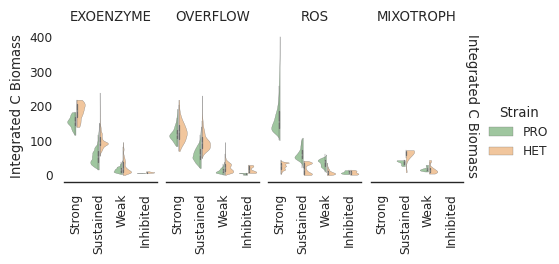

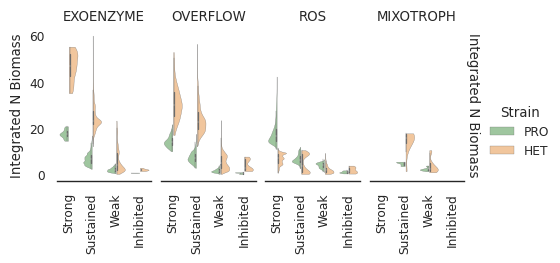

In [31]:
for vname in biomass_vars1:
    g = sns.catplot(
        data=mcomb_df.loc[mcomb_df.variable1.isin([vname])],
        x='y_pred', order=gorder1,
        y='value', #sharex=False,
        row='variable1',  #row_order=vlist,
        hue='Strain', hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
        kind='violin', #aspect=2,
        col='model', col_order=morder, split=True, density_norm='width',
        linewidth=0.2, gap=.1, #inner="quart",
        margin_titles=True,
        cut=0, aspect=0.5, 
        height=2.5,
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    g.set(ylabel=vname, xlabel='')
    g.set_xticklabels(rotation=90)
    sns.despine(left=True)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()
    
    

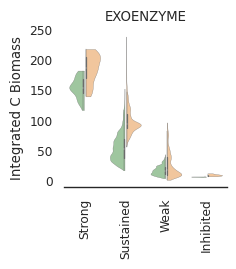

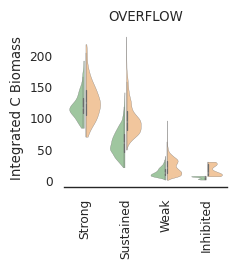

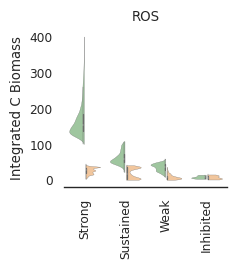

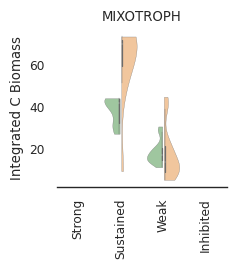

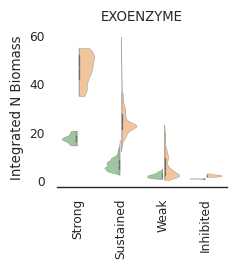

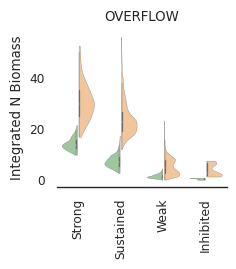

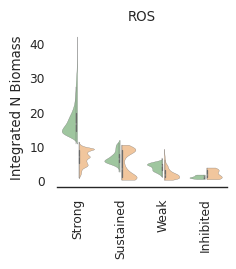

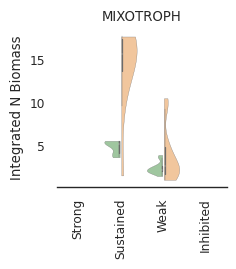

In [32]:
for vname in biomass_vars1:
    for model in morder:
        g = sns.catplot(
            data=mcomb_df.loc[mcomb_df.variable1.isin([vname]) & mcomb_df.model.isin([model])],
            x='y_pred', order=gorder1,
            y='value', #sharex=False,
            #row='variable1',  #row_order=vlist,
            hue='Strain', hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
            kind='violin', #aspect=2,
            col='model',  split=True, density_norm='width',
            linewidth=0.2, gap=.1, #inner="quart",
            legend=False,
            margin_titles=True,
            cut=0, #aspect=0., 
            height=2.5,
        ).set_titles(col_template='{col_name}', row_template='{row_name}')
        g.set(ylabel=vname, xlabel='')
        g.set_xticklabels(rotation=90)
        sns.despine(left=True)
        plt.subplots_adjust(hspace=0.1, wspace=0.1)
        plt.show()
    
    

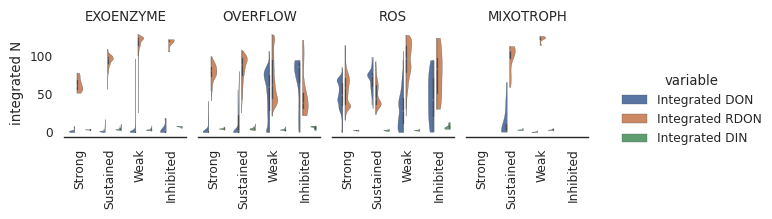

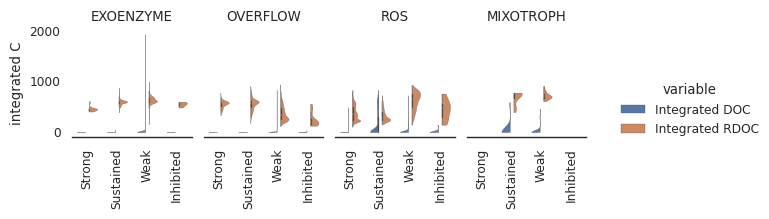

In [33]:
Cvars = [ 'Integrated DOC', 'Integrated RDOC', 'DIC', 
        ]
Nvars = [ 'Integrated DON', 'Integrated RDON', 
         'Integrated DIN',]
for vname, vlist in zip(('N', 'C'), [Nvars, Cvars]):

    g = sns.catplot(
        data=mcomb_df.loc[mcomb_df.variable.isin(vlist)],
        x='y_pred', order=gorder1,
        y='value', #sharex=False,
        #x='variable',  order=vlist,
        hue='variable', #hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
        kind='violin', #aspect=2,
        col='model', col_order=morder, 
        split=True, 
        density_norm='width',
        linewidth=0.2, gap=.3, #inner="quart",
        margin_titles=True,
        cut=0, aspect=0.8, 
        height=2,
        
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    g.set(ylabel=f'integrated {vname}', xlabel='')
        
    g.set_xticklabels(rotation=90)
    sns.despine(left=True)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()


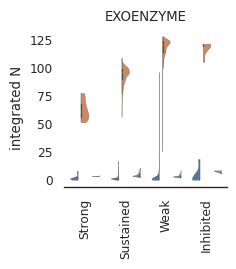

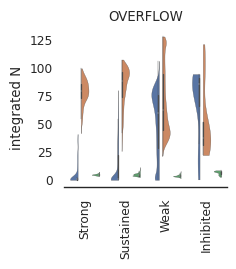

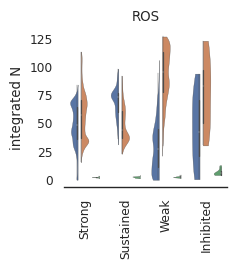

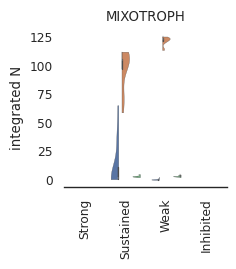

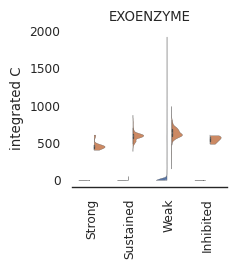

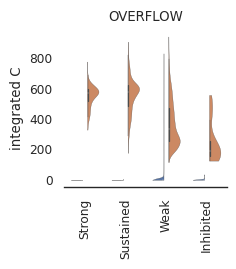

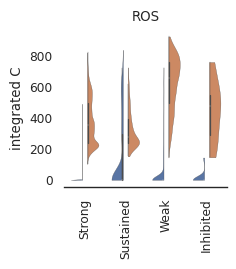

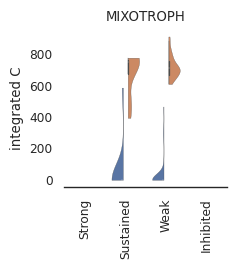

In [34]:
Cvars = [ 'Integrated DOC', 'Integrated RDOC', 'DIC', 
        ]
Nvars = [ 'Integrated DON', 'Integrated RDON', 
         'Integrated DIN',]
for vname, vlist in zip(('N', 'C'), [Nvars, Cvars]):
    for model in morder:

        g = sns.catplot(
            data=mcomb_df.loc[mcomb_df.variable.isin(vlist)& mcomb_df.model.isin([model])],
            x='y_pred', order=gorder1,
            y='value', #sharex=False,
            #x='variable',  order=vlist,
            hue='variable', #hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
            kind='violin', #aspect=2,
            col='model', #col_order=morder, 
            split=True, 
            density_norm='width',
            linewidth=0.2, gap=.3, #inner="quart",
            margin_titles=True,
            cut=0, #aspect=0.8, 
            height=2.5,
            legend=False,
            
        ).set_titles(col_template='{col_name}', row_template='{row_name}')
        g.set(ylabel=f'integrated {vname}', xlabel='')
            
        g.set_xticklabels(rotation=90)
        sns.despine(left=True)
        plt.subplots_adjust(hspace=0.1, wspace=0.1)
        plt.show()


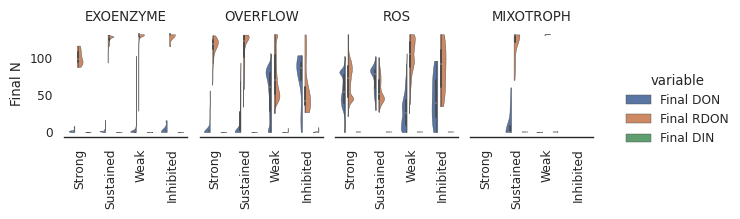

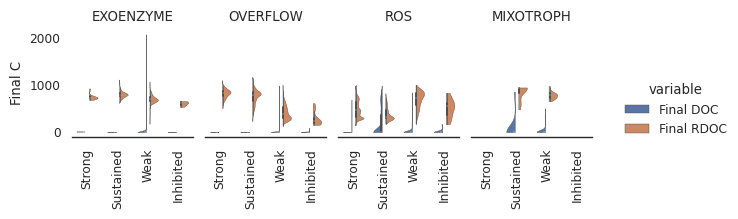

In [35]:
Cvars = [ 'Final DOC', 'Final RDOC', #'DIC', 
        ]
Nvars = [ 'Final DON', 'Final RDON', 
         'Final DIN',]
for vname, vlist in zip(('N', 'C'), [Nvars, Cvars]):

    g = sns.catplot(
        data=mcomb_df.loc[mcomb_df.variable.isin(vlist)],
        x='y_pred', order=gorder1,
        y='value', #sharex=False,
        #x='variable',  order=vlist,
        hue='variable', #hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
        kind='violin', #aspect=2,
        col='model', col_order=morder, 
        split=True, 
        density_norm='width',
        linewidth=0.3, gap=.3, #inner="quart",
        margin_titles=True,
        cut=0, aspect=0.8,
        height=2,
        
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    g.set(ylabel=f'Final {vname}', xlabel='')
        
    g.set_xticklabels(rotation=90)
    sns.despine(left=True)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()


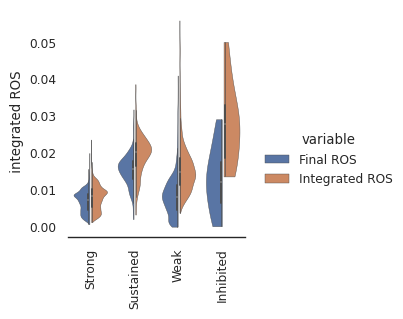

In [36]:
vname = 'ROS'
vlist = ['Integrated ROS', 'Final ROS']

g = sns.catplot(
    data=mcomb_df.loc[mcomb_df.variable.isin(vlist) & mcomb_df.model.isin(['ROS'])],
    x='y_pred', order=gorder1,
    y='value', #sharex=False,
    #x='variable',  order=vlist,
    hue='variable', #hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
    kind='violin', #aspect=2,
    #col='model', col_order=morder, 
    split=True, 
    density_norm='width',
    linewidth=0.3, gap=.1, #inner="quart",
    margin_titles=True,
    cut=0, #aspect=0.5, 
        height=3,
    #legend=False
    
).set_titles(col_template='{col_name}', row_template='{row_name}')
g.set(ylabel=f' integrated {vname}', xlabel='')
g.set_xticklabels(rotation=90)
sns.despine(left=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)
plt.show()


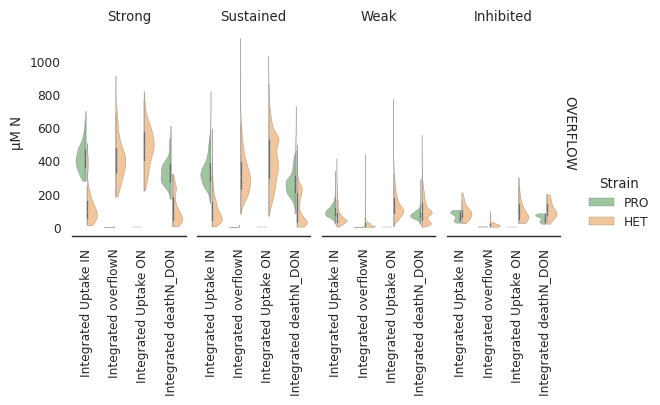

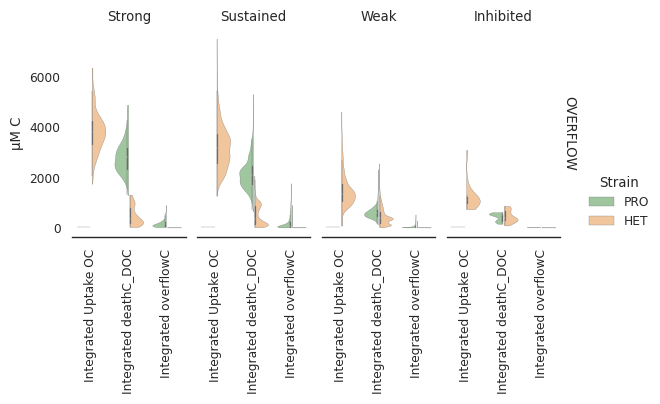

In [37]:

model = 'OVERFLOW'
for vname, vlist in zip(('N', 'C'), [overflow_N_vars,overflow_C_vars]):
    g = sns.catplot(
        data=mcomb_df.loc[mcomb_df.model.isin([model]) &mcomb_df.variable1.isin(vlist)],
        col='y_pred', col_order=gorder1,
        y='value', #sharex=False,
        x='variable1',  order=vlist,
        hue='Strain', hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
        kind='violin', #aspect=2,
        row='model', #col_order=morder, 
        split=True, density_norm='width',
        linewidth=0.2, gap=.1, #inner="quart",
        margin_titles=True,
        cut=0, aspect=0.5, 
        height=3,
        
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    g.set(ylabel=f'μM {vname}', xlabel='')
    g.set_xticklabels(rotation=90)
    sns.despine(left=True)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()


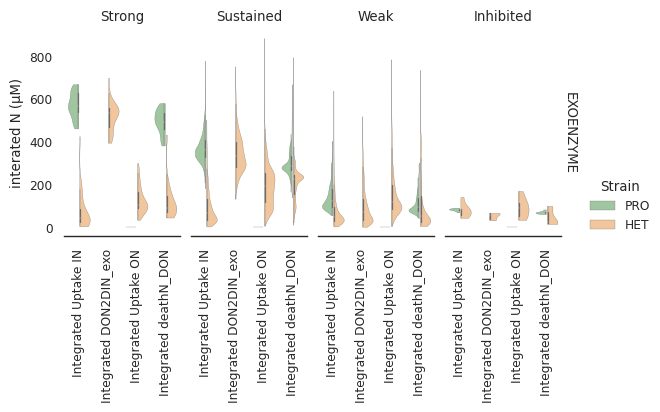

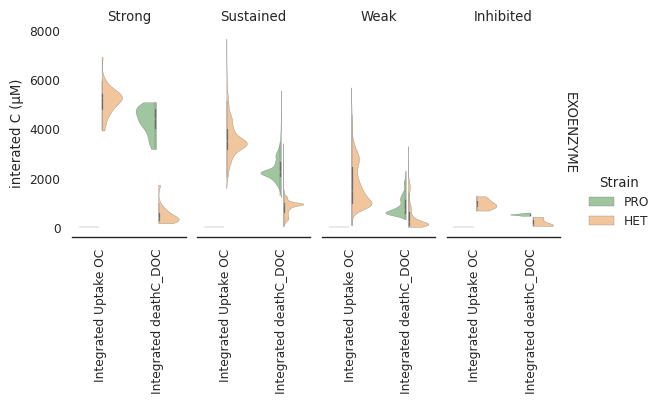

In [38]:

model = 'EXOENZYME'
for vname, vlist in zip(('N', 'C'), [exo_N_vars,exo_C_vars]):
    g = sns.catplot(
        data=mcomb_df.loc[mcomb_df.model.isin([model]) &mcomb_df.variable1.isin(vlist)],
        col='y_pred', col_order=gorder1,
        y='value', #sharex=False,
        x='variable1',  order=vlist,
        hue='Strain', hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
        kind='violin', #aspect=2,
        row='model', #col_order=morder, 
        split=True, density_norm='width',
        linewidth=0.2, gap=.1, #inner="quart",
        margin_titles=True,
        cut=0, aspect=0.5, 
        height=3,
        
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    g.set(ylabel=f'interated {vname} (μM)', xlabel='')
    g.set_xticklabels(rotation=90)
    sns.despine(left=True)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()


In [39]:
mcomb_df.variable1.value_counts()

variable1
Final DO                         100172
Final RDO                        100172
Final DI                         100172
Integrated DO                    100172
Integrated RDO                   100172
Integrated Uptake IN             100172
Integrated DI                    100172
Integrated Uptake IC             100172
Integrated Uptake ON             100172
Integrated C Biomass             100172
Integrated deathC_DOC            100172
Integrated Uptake OC             100172
Integrated overflowN             100172
Integrated overflowC             100172
Integrated ROSproduction         100172
Integrated ROSloss               100172
Integrated additionalLossRate    100172
Integrated deathN_DON            100172
Integrated N Biomass             100172
Integrated RO                     50086
Final RO                          50086
Integrated DON2DIN_exo            50086
N reus                            50086
Integrated N uptak                50086
Final Organic                 

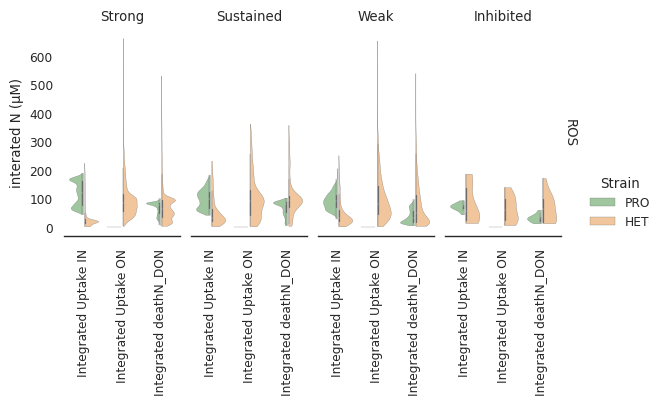

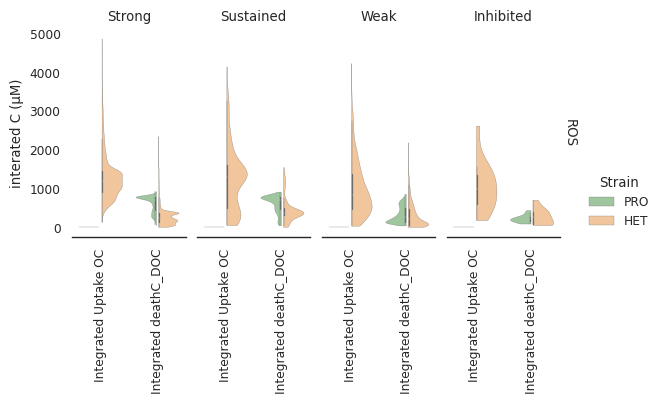

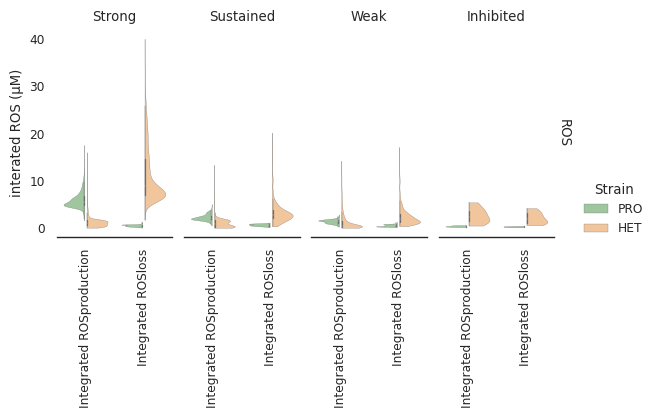

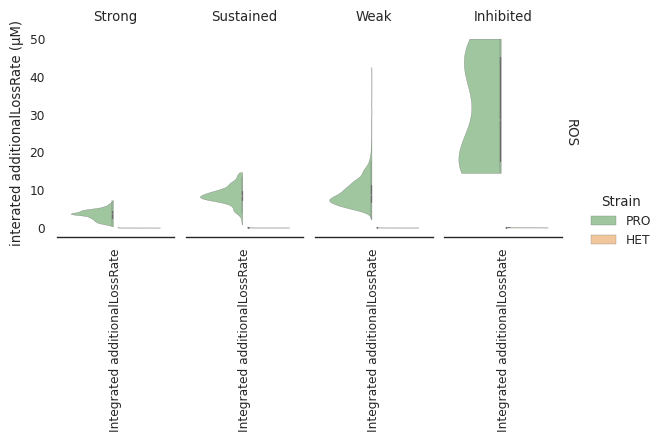

In [40]:

model = 'ROS'
for vname, vlist in zip(('N', 'C', 'ROS', 'additionalLossRate'), [ROS_N_vars,ROS_C_vars, ROS_vars, ['Integrated additionalLossRate']]):
    g = sns.catplot(
        data=mcomb_df.loc[mcomb_df.model.isin([model]) &mcomb_df.variable1.isin(vlist)],
        col='y_pred', col_order=gorder1,
        y='value', #sharex=False,
        x='variable1',  order=vlist,
        hue='Strain', hue_order=['PRO', 'HET'], palette=[PCOLOR,HCOLOR],
        kind='violin', #aspect=2,
        row='model', #col_order=morder, 
        split=True, density_norm='width',
        linewidth=0.2, gap=.1, #inner="quart",
        margin_titles=True,
        cut=0, aspect=0.5, 
        height=3,
        
    ).set_titles(col_template='{col_name}', row_template='{row_name}')
    g.set(ylabel=f'interated {vname} (μM)', xlabel='')
    
    g.set_xticklabels(rotation=90)
    sns.despine(left=True)
    plt.subplots_adjust(hspace=0.1, wspace=0.1)
    plt.show()


# BIO GEO chemical

# total PP and total N uptake

# efficiency 
# Total carbon fixation integrated vs final fixed carbon
# New production N vs recycled production


In [41]:
comb_df

,model,Phase,VPRO,Versatile,run_id,y_pred,Sample,max_prob,Final Bp,Final Np,...,PP,Total N uptake,PP / total fixed C,N reuse,Final Organic C,Integrated N uptake,Integrated C Biomassp,Integrated C Biomassh,Integrated N Biomassp,Integrated N Biomassh
0,EXOENZYME,init,vpro_11_62_EXOENZYME_C1,True,monte_EXOENZYME_100_monte_vpro_11_62_EXOENZYME...,Sustained,6C0,0.974799,0.189774,0.037612,...,3392.013607,662.232153,4.083412,6.429438,830.681150,662.232153,35.218538,95.660193,4.165977,23.629737
1,EXOENZYME,init,vpro_19_83_EXOENZYME_C1,True,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,Sustained,7B0,0.377493,0.112971,0.030997,...,2715.276632,617.857035,3.828681,5.998612,709.193838,617.857035,21.429461,78.390695,2.812101,19.579641
2,EXOENZYME,init,vpro_19_83_EXOENZYME_C1,True,monte_EXOENZYME_100_monte_vpro_19_83_EXOENZYME...,Sustained,7B0,0.976839,0.221242,0.060235,...,3322.877805,604.641399,4.237722,5.870305,784.118909,604.641399,26.370281,98.718603,3.452752,26.932746
3,EXOENZYME,init,vpro_23_76_EXOENZYME_C2,True,monte_EXOENZYME_100_monte_vpro_23_76_EXOENZYME...,Sustained,7A0,0.960090,1.652114,0.181078,...,5010.989125,855.363385,5.747878,8.304499,871.798130,855.363385,78.080014,123.708330,10.225440,30.982599
4,EXOENZYME,init,vpro_39_73_EXOENZYME_C2,True,monte_EXOENZYME_100_monte_vpro_39_73_EXOENZYME...,Weak,11A0,0.965416,0.002081,0.000372,...,901.652705,369.780635,1.482293,3.590103,608.282368,369.780635,10.666323,13.126725,1.527089,3.144511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50081,ROS,add,vpro_19_33_ROS_C0_684,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_684_23_...,Strong,5x5_21B0,0.942628,2.141059,0.031417,...,3403.430449,273.500284,4.732945,2.655343,719.093599,273.500284,136.863135,18.861133,14.672990,4.937333
50082,ROS,add,vpro_19_33_ROS_C0_912,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_912_33_...,Strong,5x5_21B0,0.968076,2.863904,0.043200,...,3566.770328,298.910226,10.195182,2.902041,349.848632,298.910226,145.113712,34.973636,15.515652,8.135469
50083,ROS,add,vpro_19_33_ROS_C0_932,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_932_42_...,Strong,5x5_21A0,0.980187,3.947607,0.030296,...,4430.535658,407.738040,9.106391,3.958622,486.530341,407.738040,207.718633,27.721930,22.098025,6.114775
50084,ROS,add,vpro_19_33_ROS_C0_979,True,monteadd_ROS_9_monte_vpro_19_33_ROS_C0_979_4_l...,Weak,10C0,0.407143,0.380849,0.012095,...,1373.751552,349.485154,2.469820,3.393060,556.215166,349.485154,40.293504,9.031929,4.459793,2.053807


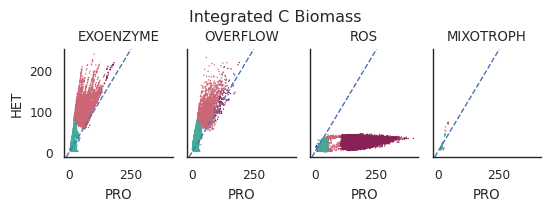

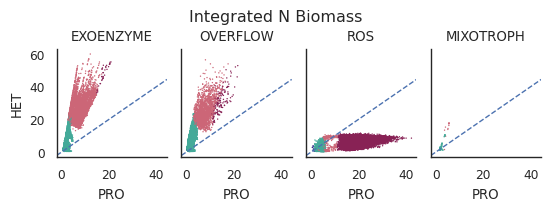

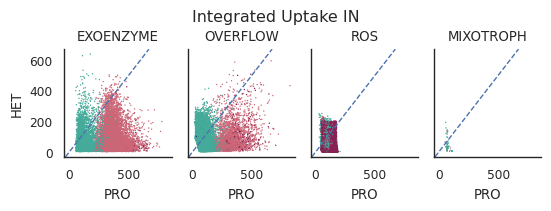

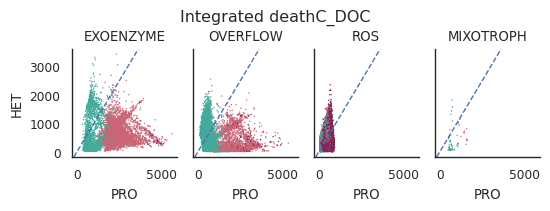

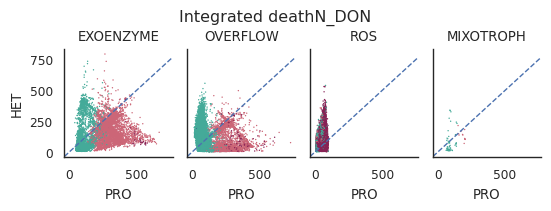

In [42]:
for paramname in  [
    'Integrated C Biomass',
    'Integrated N Biomass',
    'Integrated Uptake IN',
    'Integrated deathC_DOC',
    'Integrated deathN_DON',
    
]:
    g = sns.relplot(
        data=comb_df,    
        hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
        x=f'{paramname}p', y=f'{paramname}h',
        col='model', col_order=morder,
        s=1, lw=0,
        height=2, aspect=0.7, legend=False,    
    )
    g.set(xlabel='PRO', ylabel='HET')
    plt.suptitle(paramname, y=1.03)
    for col_val, ax in g.axes_dict.items():
        ax.axline((0,0), (1,1),lw=1, ls='--')
    #g.set(ylim=(0,900),xlim=(0,900), )
    g.set_titles(col_template='{col_name}', row_template='{row_name}')
    plt.show()

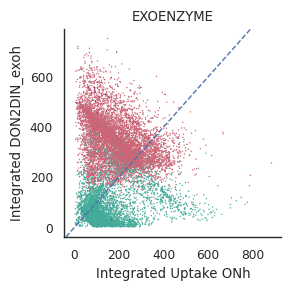

In [43]:
plt.rcParams["legend.markerscale"] = 2.5
g = sns.relplot(
    data=comb_df,    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    x='Integrated Uptake ONh', y='Integrated DON2DIN_exoh',
    col='model', col_order=['EXOENZYME'],
    s=1, lw=0,
    height=3, aspect=1, legend=False,
    
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (10,10),lw=1, ls='--')
#g.set(ylim=(0,900),xlim=(0,900), )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

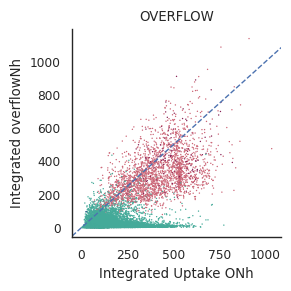

In [44]:
plt.rcParams["legend.markerscale"] = 2.5
g = sns.relplot(
    data=comb_df,    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    x='Integrated Uptake ONh', y='Integrated overflowNh',
    col='model', col_order=['OVERFLOW'],
    s=1, lw=0,
    height=3, aspect=1, legend=False,
    
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (10,10),lw=1, ls='--')
#g.set(ylim=(0,900),xlim=(0,900), )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

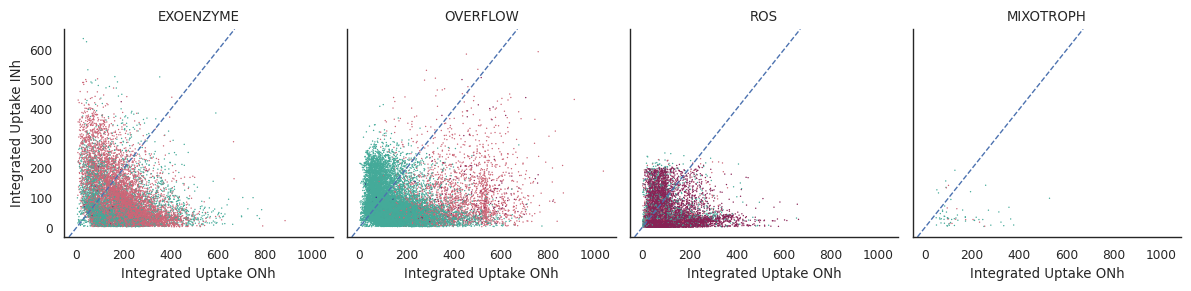

In [45]:
plt.rcParams["legend.markerscale"] = 2.5
g = sns.relplot(
    data=comb_df,    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    x='Integrated Uptake ONh', y='Integrated Uptake INh',
    col='model', col_order=morder,
    s=1, lw=0,
    height=3, aspect=1, legend=False,
    
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (10,10),lw=1, ls='--')
#g.set(ylim=(0,900),xlim=(0,900), )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

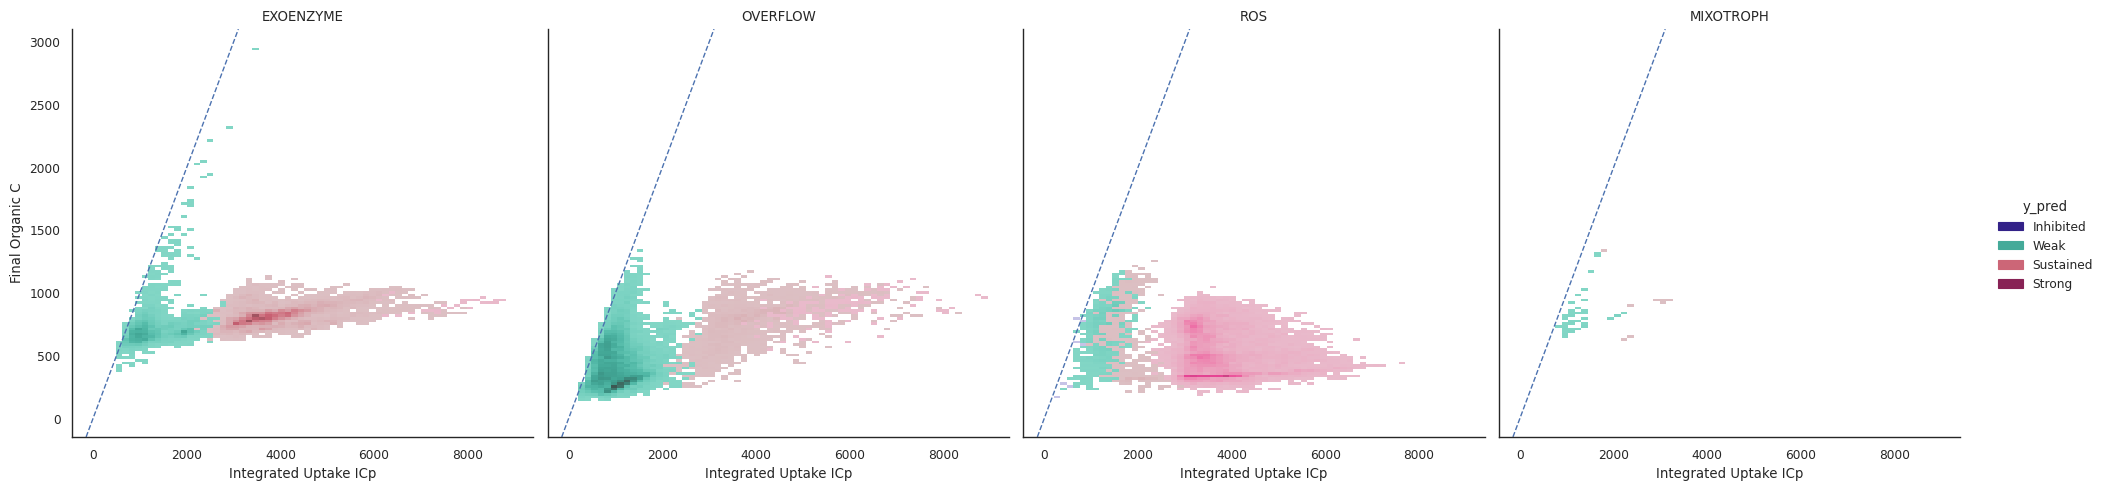

In [46]:
plt.rcParams["legend.markerscale"] = 2.5
g = sns.displot(
    data=comb_df,    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    y='Final Organic C', x='Integrated Uptake ICp',
    col='model', col_order=morder,
    #s=1, lw=0,
    #height=3,
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')

# #g.set(ylim=(0,850),xlim=(0,850), )
# g.set(yscale='log', #ylim=(5e-3, 40)
#      )
#g.set(ylabel='net PP', xlabel='gross PP')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

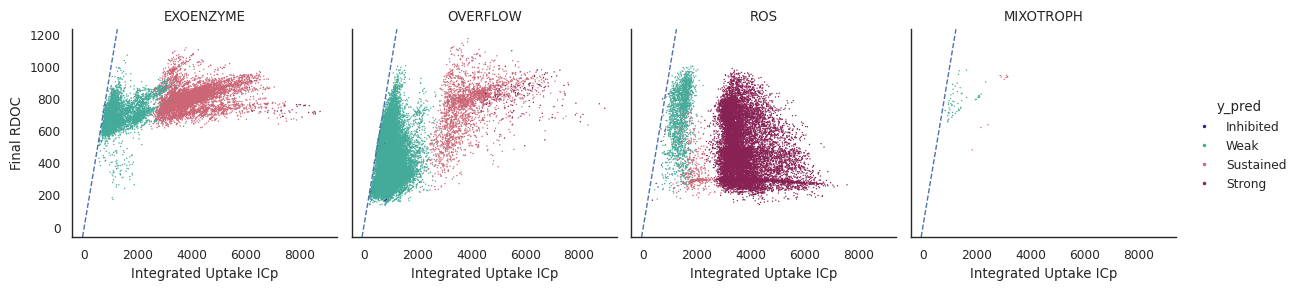

In [47]:
plt.rcParams["legend.markerscale"] = 2.5
g = sns.relplot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    y='Final RDOC', x='Integrated Uptake ICp',
    col='model', col_order=morder,
    s=1, lw=0,
    height=3,
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')

# #g.set(ylim=(0,850),xlim=(0,850), )
# g.set(yscale='log', #ylim=(5e-3, 40)
#      )
#g.set(ylabel='final RDOC', xlabel='gross PP')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

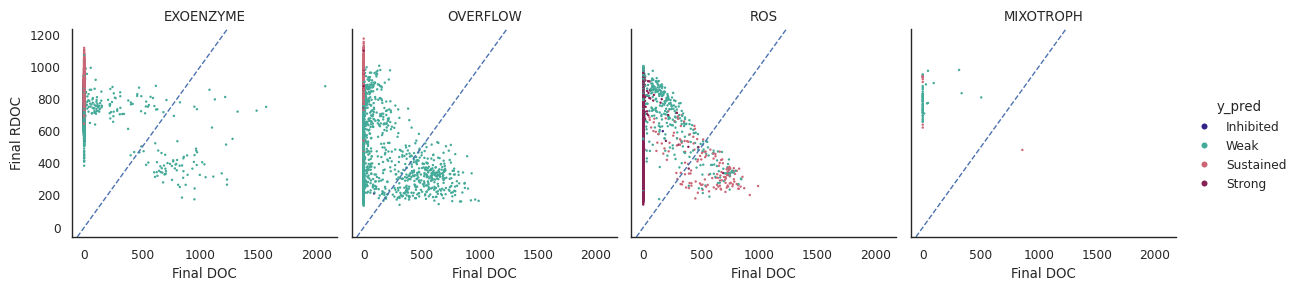

In [48]:
plt.rcParams["legend.markerscale"] = 2.5
g = sns.relplot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    y='Final RDOC', x='Final DOC',
    col='model', col_order=morder,
    s=3, lw=0,
 height=3,   
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')

# #g.set(ylim=(0,850),xlim=(0,850), )
# g.set(yscale='log', #ylim=(5e-3, 40)
#      )
#g.set(ylabel='final RDOC', xlabel='final DOC')
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

In [49]:
value_cols

['Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 'Integrated DON',
 'Integrated RDON',
 'Integrated DIN',
 'Integrated DOC',
 'Integrated RDOC',
 'Integrated DIC',
 'Integrated ROS',
 'Integrated Uptake INp',
 'Integrated Uptake INh',
 'Integrated Uptake ONp',
 'Integrated Uptake ONh',
 'Integrated Uptake ICp',
 'Integrated Uptake ICh',
 'Integrated Uptake OCp',
 'Integrated Uptake OCh',
 'Integrated overflowNp',
 'Integrated overflowNh',
 'Integrated overflowCp',
 'Integrated overflowCh',
 'Integrated ROSproductionp',
 'Integrated ROSproductionh',
 'Integrated ROSlossp',
 'Integrated ROSlossh',
 'Integrated DON2DIN_exoh',
 'Integrated additionalLossRatep',
 'Integrated additionalLossRateh',
 'Integrated deathC_DOCp',
 'Integrated deathC_DOCh',
 'Integrated deathN_DONp',
 'Integrated deathN_DONh',
 'N reuse',
 'Final Organic C',
 'Integrated N uptake',
 'Integrated C Biomassp',
 'Integrated C Biomassh',
 'Integrated N Biomassp',
 'Int

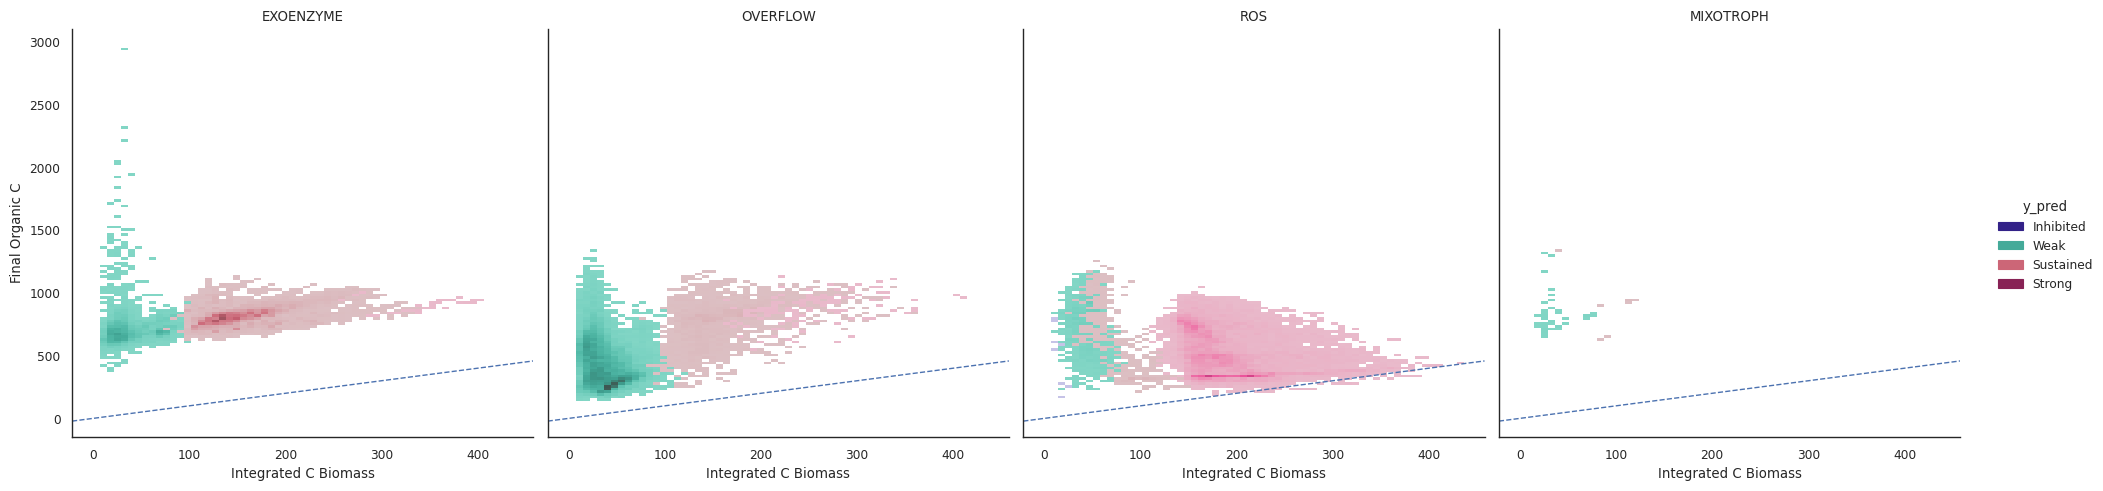

In [50]:
comb_df['Integrated C Biomass']  = comb_df['Integrated C Biomassp'] +comb_df['Integrated C Biomassh']
comb_df['Integrated N Biomass']  = comb_df['Integrated N Biomassp'] +comb_df['Integrated N Biomassh']
plt.rcParams["legend.markerscale"] = 2.5

g = sns.displot(
    data=comb_df,    
    hue='y_pred', hue_order=reversed(gorder1), palette=reversed(gpalette1),
    y='Final Organic C', x='Integrated C Biomass',
    col='model', col_order=morder,
    #s=1, lw=0,
    #height=2,
)
for col_val, ax in g.axes_dict.items():
    ax.axline((0,0), (20,20),lw=1, ls='--')

#g.set(ylim=(0,850),xlim=(0,850), )
#g.set(yscale='log', #ylim=(5e-3, 40)
#     )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
plt.show()

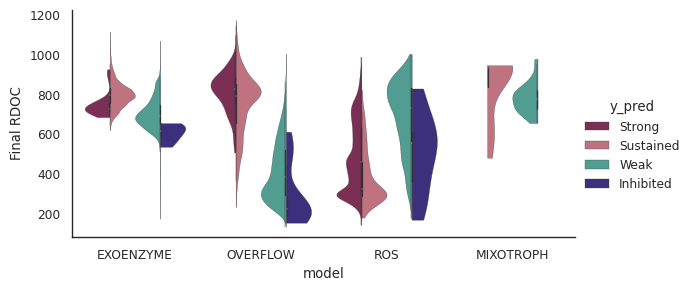

In [51]:
g = sns.catplot(
    data=comb_df,
     y='Final RDOC', 
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    x='model', order=morder,
    kind='violin',
    aspect=2, height=3, linewidth=0.2,
    #    split=True, 
    density_norm='width',
        #linewidth=0.2, gap=.1, #inner="quart",
        #margin_titles=True,
        cut=0, #aspect=0.5, 
    split=True,
)
#g.set(ylim=(0,1500))
#g.set(ylabel='net PP')

plt.show()

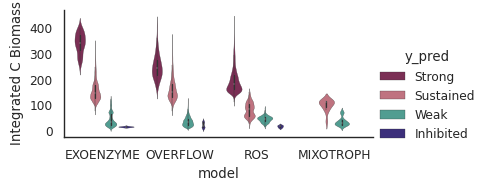

In [52]:
g = sns.catplot(
    data=comb_df,
     y='Integrated C Biomass', 
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    x='model', order=morder,
    kind='violin',
    aspect=2, height=2, linewidth=0.2,
    #split=True,
    
)
#plt.axhline
#g.set(ylim=(0,1300))

plt.show()

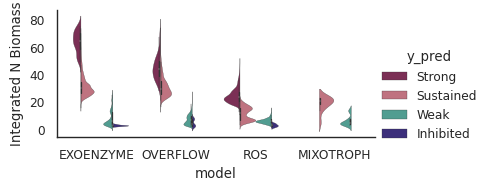

In [53]:
g = sns.catplot(
    data=comb_df,
     y='Integrated N Biomass', 
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    x='model', order=morder,
    kind='violin',
    aspect=2, height=2, linewidth=0.2,
    split=True,
    
)
#plt.axhline
#g.set(ylim=(0,1300))

plt.show()

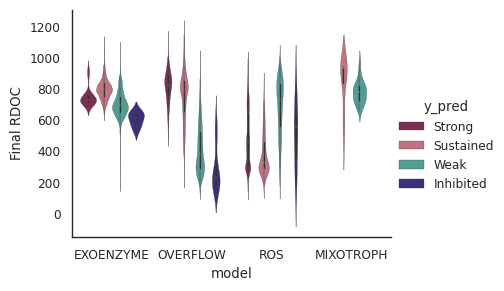

In [54]:
g = sns.catplot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
     y='Final RDOC', 
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    x='model', order=morder,
    kind='violin', #split=True,
    aspect=1.4,
    linewidth=0.2, height=3,
    #split=True,
    
)
#g.set(#ylim=(5e-2,20),
#      yscale='log')
#plt.axhline(1,lw=1, ls='--')

plt.show()

In [55]:
comb_df.columns.to_list()

['model',
 'Phase',
 'VPRO',
 'Versatile',
 'run_id',
 'y_pred',
 'Sample',
 'max_prob',
 'Final Bp',
 'Final Np',
 'Final Cp',
 'Final Bh',
 'Final Nh',
 'Final Ch',
 'Final DON',
 'Final RDON',
 'Final DIN',
 'Final DOC',
 'Final RDOC',
 'Final DIC',
 'Final ROS',
 't',
 'day',
 'Final Uptake INp',
 'Final Uptake INh',
 'Final Uptake ONp',
 'Final Uptake ONh',
 'Final Uptake ICp',
 'Final Uptake ICh',
 'Final Uptake OCp',
 'Final Uptake OCh',
 'uptakeNp',
 'uptakeNh',
 'uptakeCp',
 'uptakeCh',
 'QCp',
 'QCh',
 'biosynthesisNp',
 'biosynthesisNh',
 'Final respirationCp',
 'Final respirationCh',
 'biomass_breakdownCp',
 'biomass_breakdownCh',
 'Final overflowNp',
 'Final overflowNh',
 'Final overflowCp',
 'Final overflowCh',
 'Bp[C]',
 'Final Bptotal[N]',
 'Final Bptotal[C]',
 'Bh[C]',
 'Final Bhtotal[N]',
 'Final Bhtotal[C]',
 'Final ROSproductionp',
 'Final ROSproductionh',
 'Final ROSlossp',
 'Final ROSlossh',
 'deathbiomassNp',
 'deathbiomassNh',
 'deathstoreNp',
 'deathstoreNh',
 

In [56]:
comb_df['Carbon Use Efficiency'] = comb_df['Final Organic C'].div(comb_df['Integrated Uptake ICp'] )


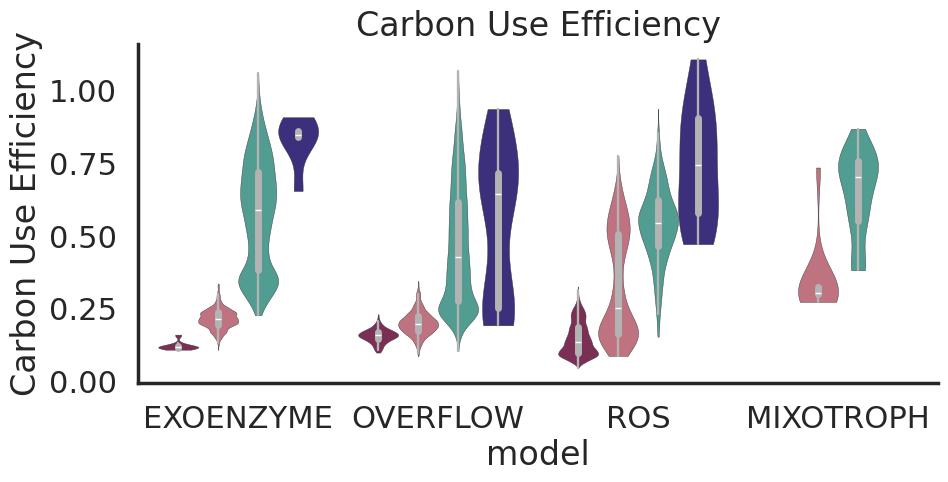

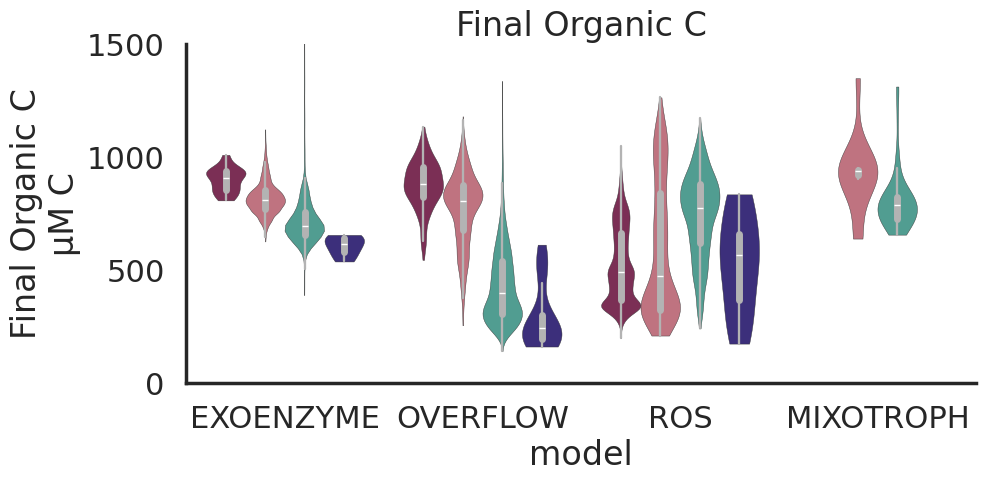

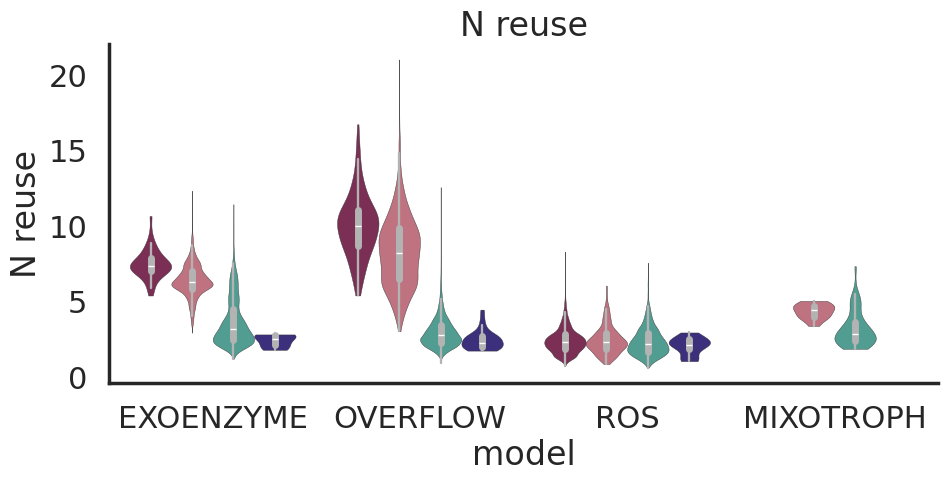

In [74]:
sns.set_context('poster')# , font_scale=1.5)
for c in ['Carbon Use Efficiency', 'Final Organic C', 'N reuse', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        #height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

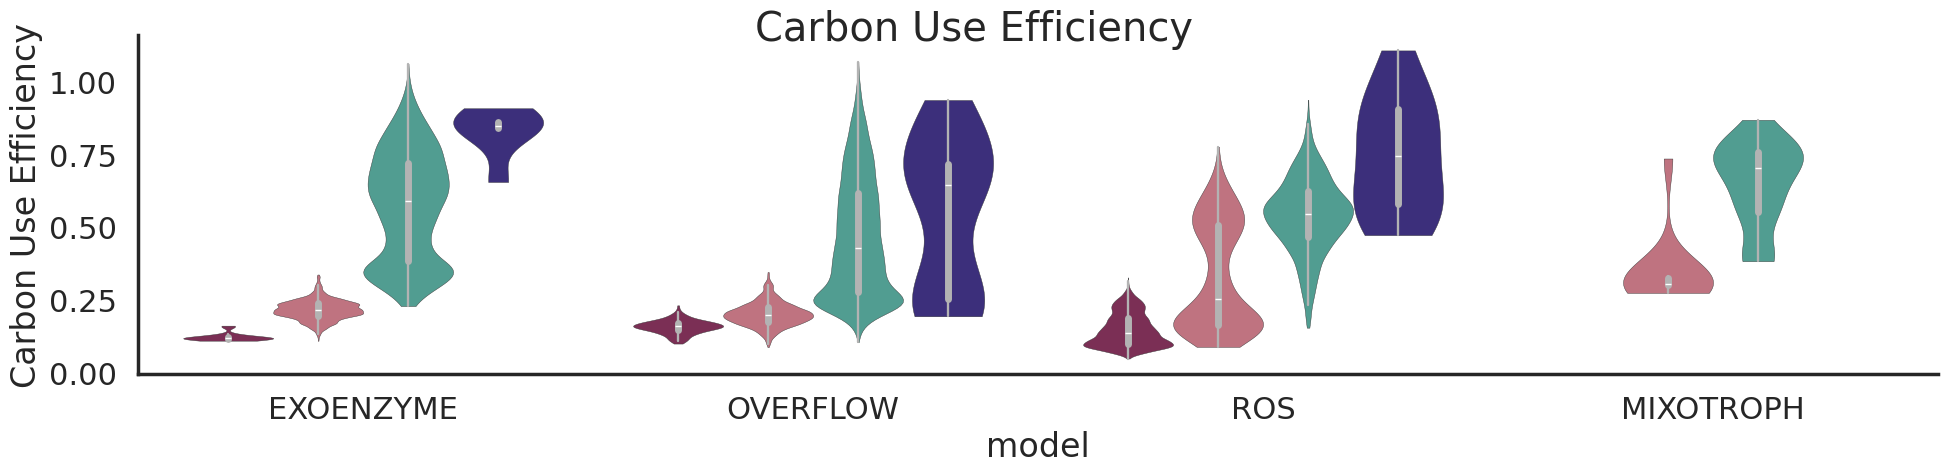

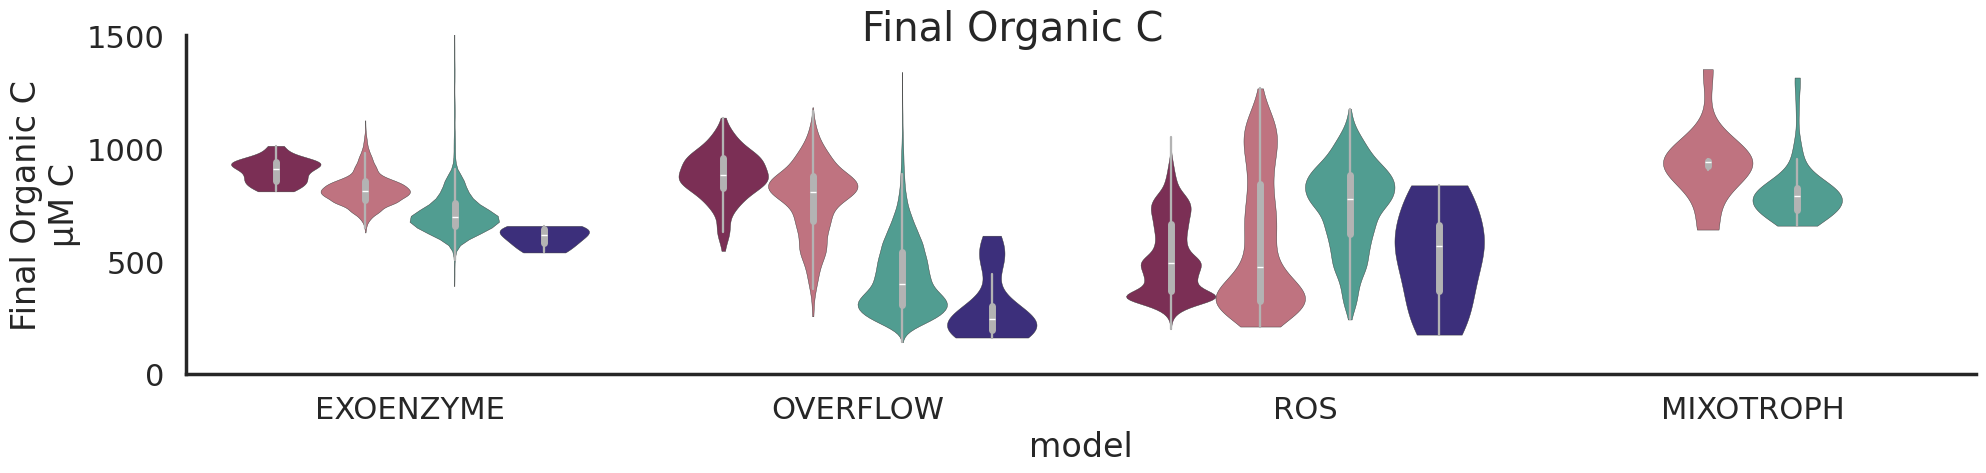

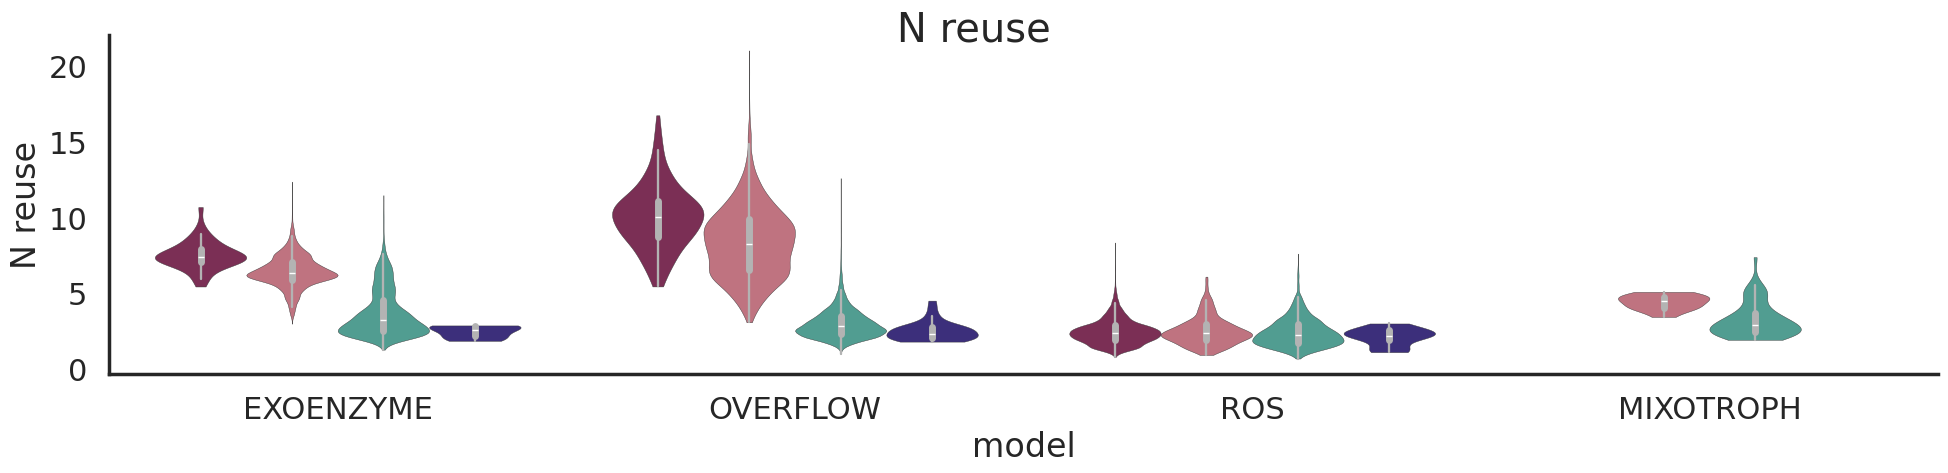

In [85]:
sns.set_context('poster')# , font_scale=1.5)
for c in ['Carbon Use Efficiency', 'Final Organic C', 'N reuse', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        #col='model', col_order=morder, sharex=False,
        #facet_kws=dict(sharex=False),
        aspect=4,
        linewidth=0.3, 
        #height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
    # g.set(xticklabels=[], xlabel='')
    g.set_titles(col_template='')
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.suptitle(c)
    plt.show()

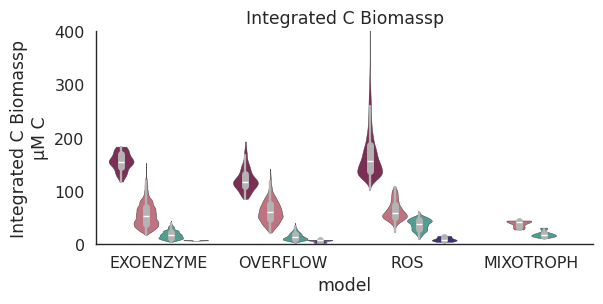

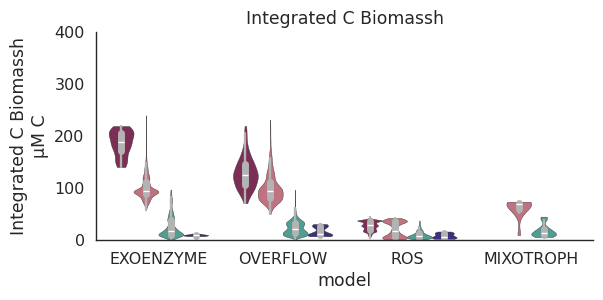

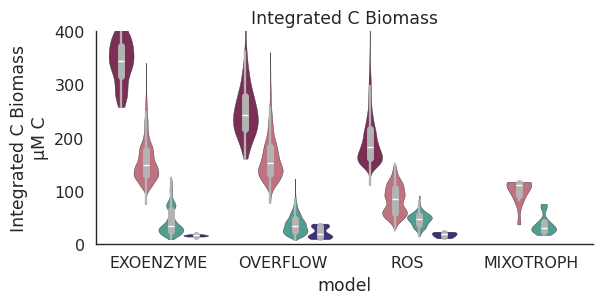

In [58]:
sns.set_context('paper', font_scale=1.3)
for c in ['Integrated C Biomassp', 'Integrated C Biomassh', 'Integrated C Biomass', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    #if c == 'Final Organic C':
    g.set(ylim=(0,400), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

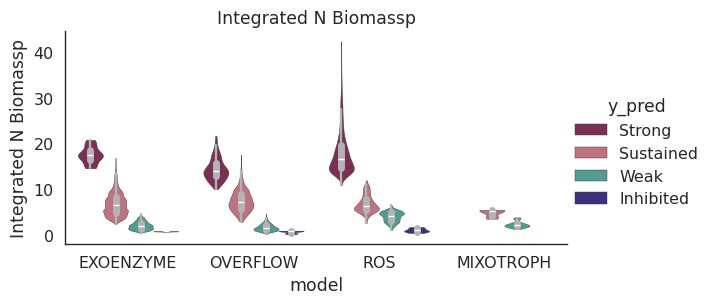

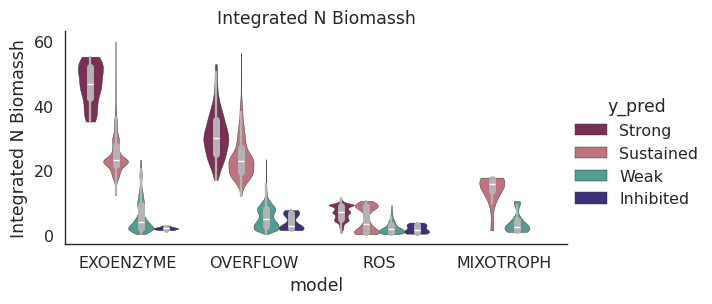

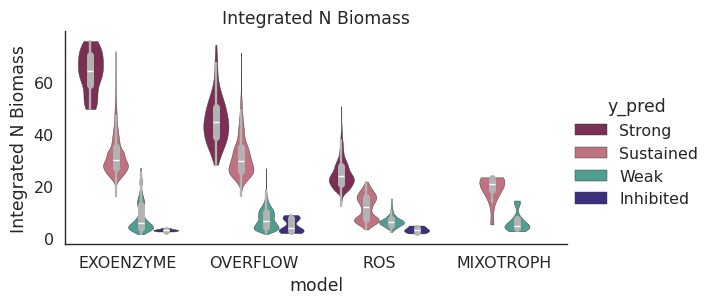

In [59]:
sns.set_context('paper', font_scale=1.3)
for c in ['Integrated N Biomassp', 'Integrated N Biomassh', 'Integrated N Biomass', ]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

In [60]:
comb_df['Final RDOC / Organic C'] = comb_df['Final RDOC'].div(comb_df['Final Organic C'])
comb_df['Final RDON / Total N'] = comb_df['Final RDON'].div(INIT_BH+INIT_BP+INIT_DIN+ INIT_DON)

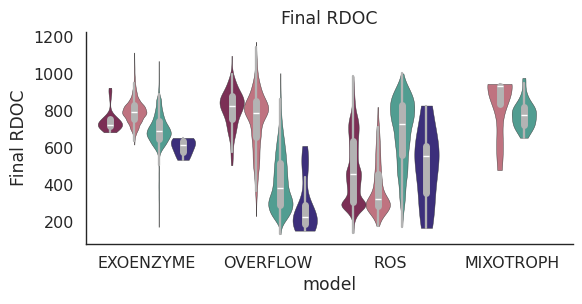

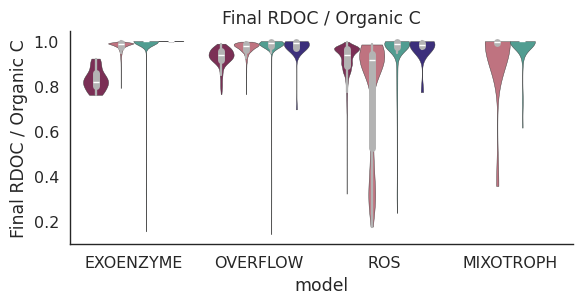

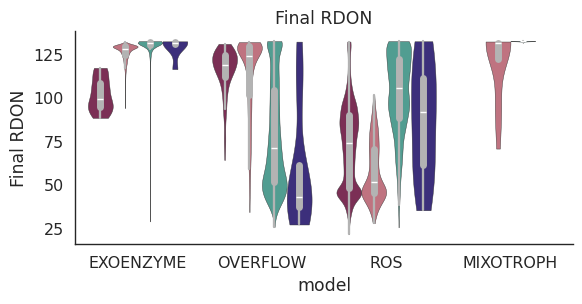

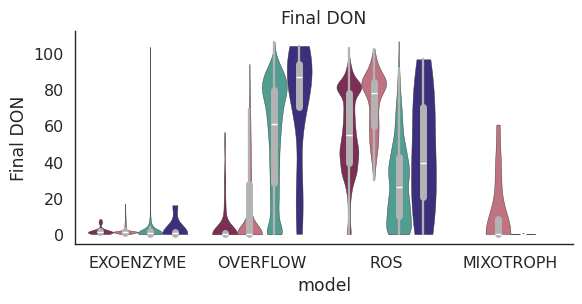

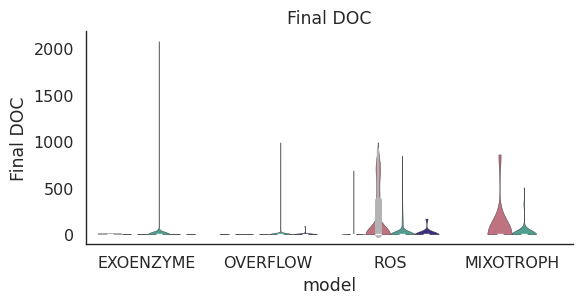

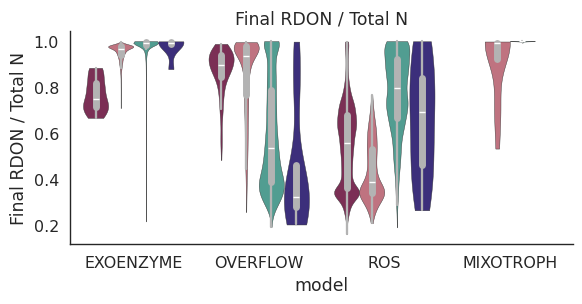

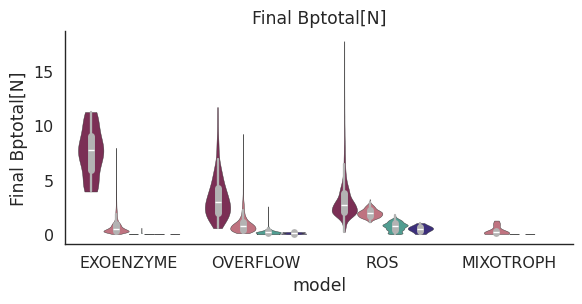

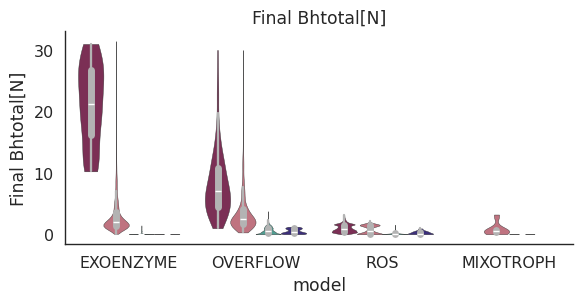

In [61]:
sns.set_context('paper', font_scale=1.3)
for c in ['Final RDOC', 'Final RDOC / Organic C', 'Final RDON', 'Final DON', 'Final DOC', 'Final RDON / Total N',  'Final Bptotal[N]', 'Final Bhtotal[N]',]:
    g = sns.catplot(
        data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
         y=c, 
        hue='y_pred', hue_order=gorder1, palette=gpalette1,
        x='model', order=morder,
        kind='violin', #split=True,
        aspect=2,
        linewidth=0.3, 
        height=3,
        #split=True,
        common_norm=False, cut=0,density_norm='width',
        #inner='quart',
         #inner_kws=dict(box_width=7, whis_width=1, color=".7", linewidth=0.5, ),
         inner_kws=dict( box_width=5, color=".7", ),
        legend=False,
    )
    if c == 'Final Organic C':
        g.set(ylim=(0,1500), ylabel=f'{c}\nµM C')
        
    #g.set(#ylim=(5e-2,20),
    #      yscale='log')
    #plt.axhline(1,lw=1, ls='--')
    plt.title(c)
    plt.show()

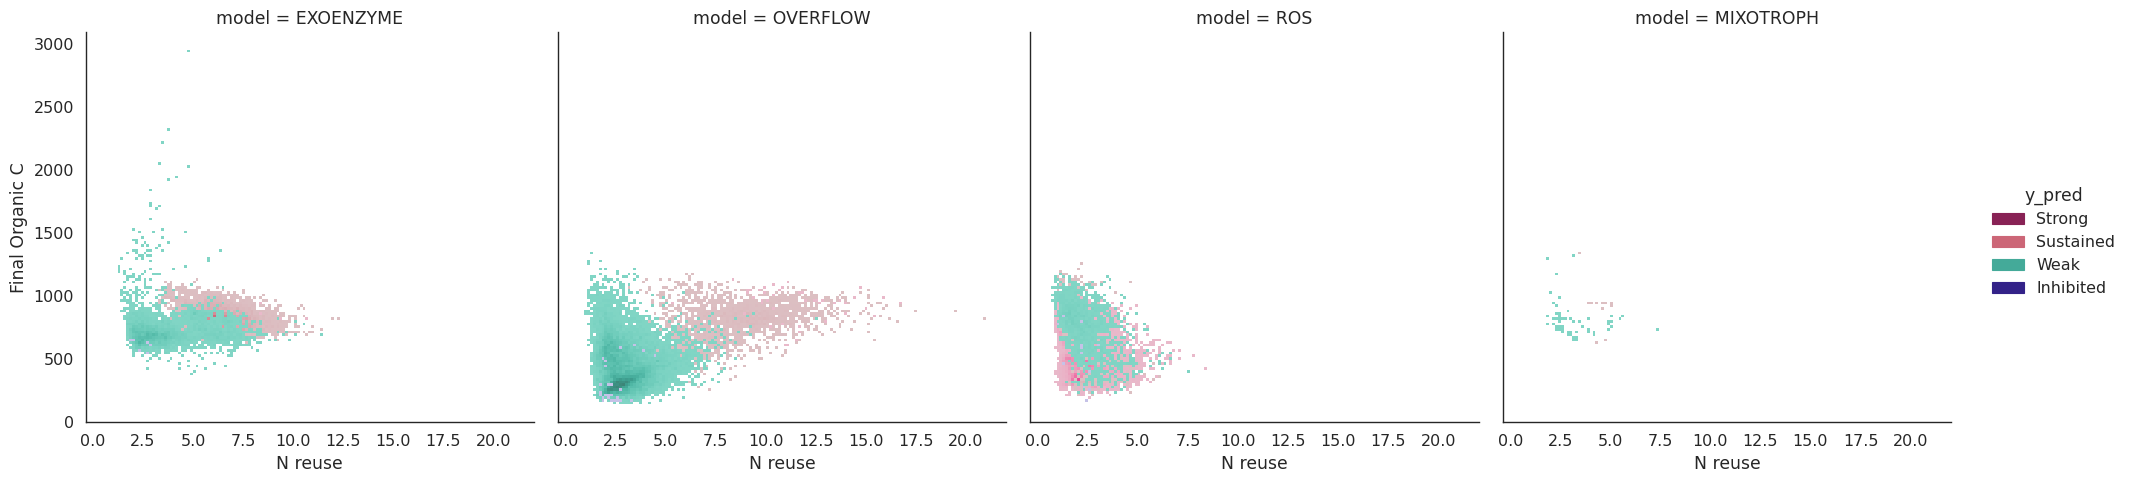

In [62]:
sns.set_context('paper', font_scale=1.3)
g = sns.displot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
     y='Final Organic C', x='N reuse',
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    col='model', col_order=morder,
)


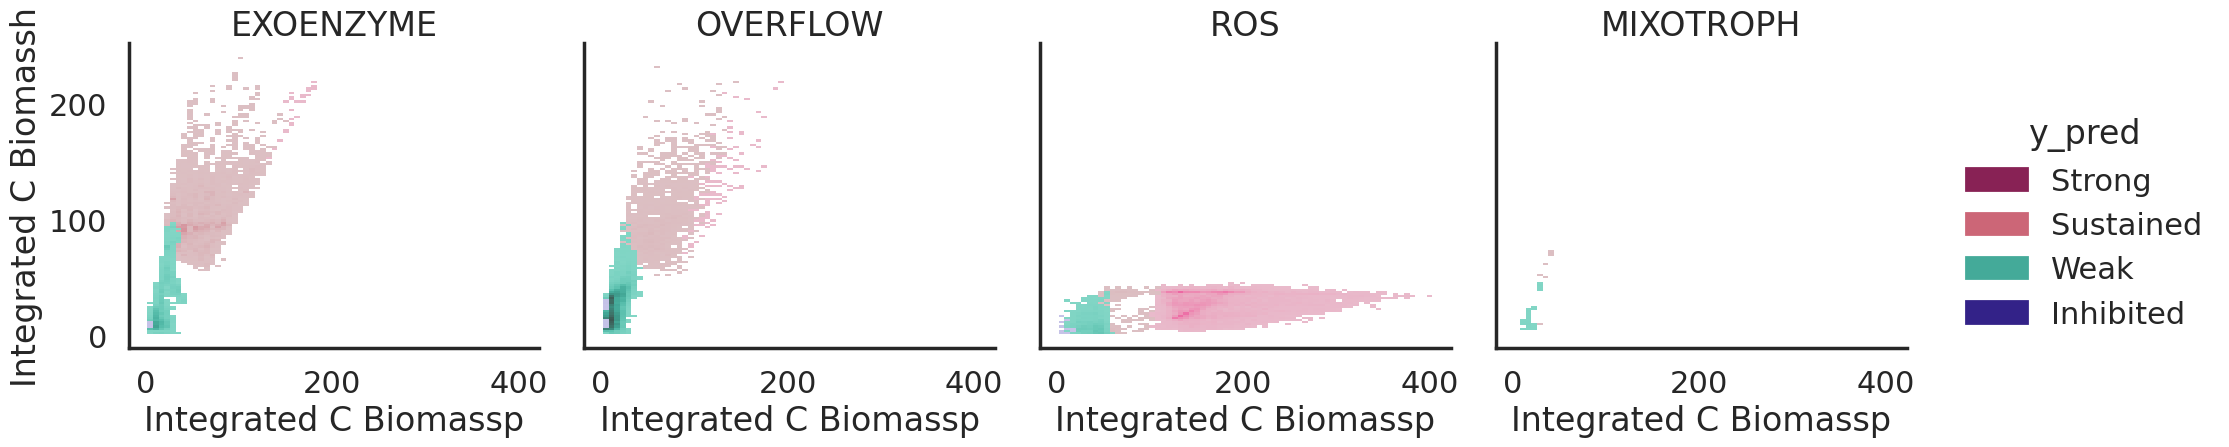

In [64]:
sns.set_context('poster') #, font_scale=1.3)
g = sns.displot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
     y='Integrated C Biomassh', x='Integrated C Biomassp',
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    col='model', col_order=morder,
)
g.set_titles(col_template='{col_name}')

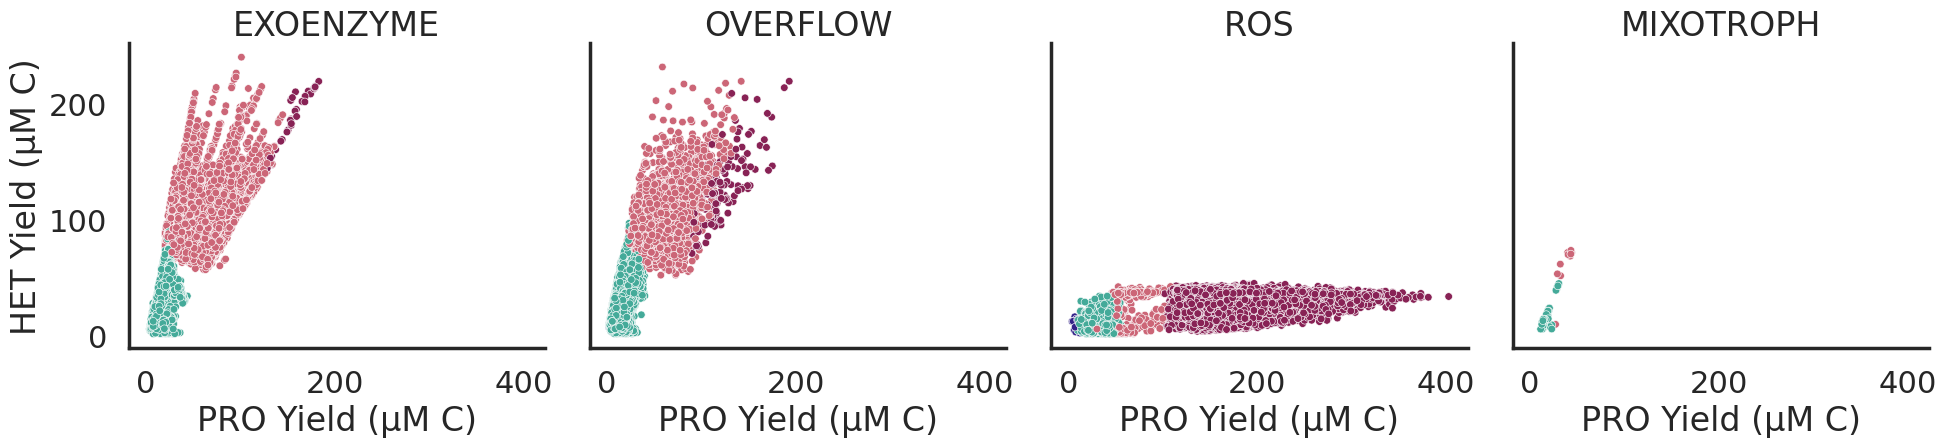

In [68]:
sns.set_context('poster') #, font_scale=1.3)
g = sns.relplot(
    data=comb_df.loc[~comb_df.y_pred.isin(['Axenic', 'Other'])],
     y='Integrated C Biomassh', x='Integrated C Biomassp',
    hue='y_pred', hue_order=gorder1, palette=gpalette1,
    col='model', col_order=morder, s=30,
    legend=False, aspect=1,
)
g.set_titles(col_template='{col_name}')
g.set(xlabel='PRO Yield (µM C)', ylabel='HET Yield (µM C)')